<a href="https://colab.research.google.com/github/rheyavlan/MachineLearning/blob/main/Soluion2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

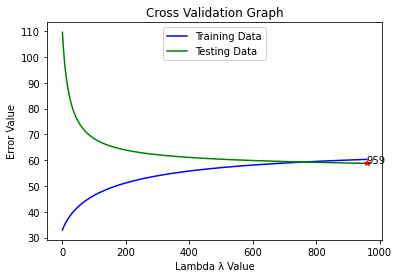

In [63]:
from scipy.io import loadmat 
from sklearn.model_selection import train_test_split
import numpy as np
from numpy.linalg import inv,pinv,norm
import matplotlib.pyplot as plt

"""
 Finds a D-1 order polynomial fit to the data

function [err,model,errT] = polyreg(x,y,D,xT,yT)

 x = vector of input scalars for training
 y = vector of output scalars for training
 L = Lambda
 xT = vector of input scalars for testing
 yT = vector of output scalars for testing
 err = average squared loss on training
 model = vector of polynomial parameter coefficients
 errT = average squared loss on testing

 Example Usage:

 x = 3*(rand(50,1)-0.5);
 y = x.*x.*x-x+rand(size(x));
 [err,model] = polyreg(x,y,4);
"""

training_label = "Training Data"
testing_label = "Testing Data"

lamda = 960

def polyreg(x, y, L, xT, yT):

    xTx        = x.T.dot(x) + L * np.identity(x.shape[-1])
    theta      = inv(xTx).dot(x.T).dot(y)
    norm_theta = norm(theta)
    train_err  = (0.5/x.shape[0]) * (np.sum(np.power(y-x.dot(theta),2))+  L * norm_theta * norm_theta)
    test_err   = (0.5/xT.shape[0])  * (np.sum(np.power(yT-xT.dot(theta),2))  +  L * norm_theta * norm_theta)
    
    """
    plt.figure(norm_theta)
    plt.title('Plot for Norm Theta value = '+str(norm_theta))
        
    plt.plot(x, y, 'b+', label=training_label)
    plt.plot(xT, yT, 'g+', label=testing_label)

    #plt.plot(x, X_train.dot(model), 'r+')
        
    plt.legend(loc='upper center')
    plt.show()
    """
    return train_err, test_err


if __name__=="__main__":

    #Load MATLAB file problem1 consisting for 500 records for x and y of dataType Double 
    given_data = loadmat('problem2.mat')
    x = given_data['x']
    y = given_data['y']

    #Divide the data set into training and testing data after shuffling. 50% Training and 50% Testing 
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, shuffle=True)    

    #Call the function polyreg 
    errors = [polyreg(x_train, y_train, i, x_test, y_test) for i in range(lamda)]

    #Get training and testing errors from the value returned by the polyreg function 
    err = [e[0] for e in errors]
    errT  = [e[1] for e in errors]

    #Return index of the minimum element of the test error array 
    minimum_test_error = np.argmin(errT)

    #We use matplotlib.lines.Line2D
    plt.figure(0)
    plt.xlabel('Lambda λ Value'); 
    plt.ylabel('Error Value')
    plt.title('Cross Validation Graph')

    train_line, = plt.plot(range(lamda), err,'blue',label=training_label)
    test_line, = plt.plot(range(lamda), errT, 'green', label=testing_label)

    #Highlight the value of D
    plt.plot(minimum_test_error, errT[minimum_test_error], 'r*')
    plt.text(minimum_test_error, errT[minimum_test_error], minimum_test_error)

    plt.legend(handles=[train_line, test_line], loc='upper center')
    plt.show()